In [55]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [56]:
# Load the dataset
df = load_breast_cancer()
X = pd.DataFrame(df.data, columns=df.feature_names)
y = pd.Series(df.target, name='target')
X.shape, y.shape

((569, 30), (569,))

In [57]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [58]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [59]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [60]:
# Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")

Decision Tree Accuracy: 0.9473684210526315
Random Forest Accuracy: 0.9649122807017544


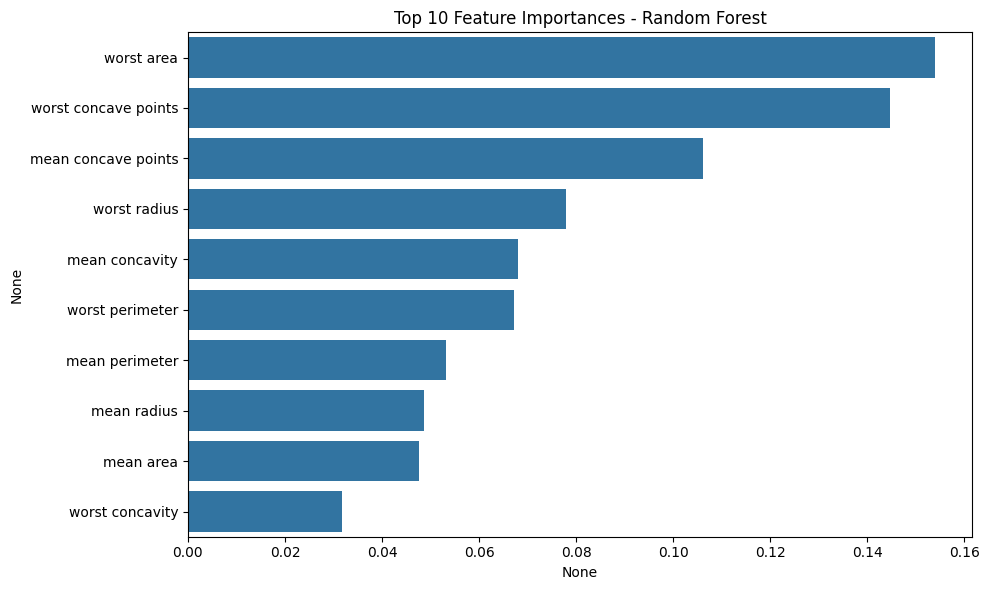

In [61]:
# Feature importances from Random Forest
imp = rf_model.feature_importances_
feat_imp = pd.Series(imp, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title("Top 10 Feature Importances - Random Forest")
plt.tight_layout()

In [62]:
#Decision tree report
classification_report(y_test, y_pred_dt, output_dict=True)

{'0': {'precision': 0.9302325581395349,
  'recall': 0.9302325581395349,
  'f1-score': 0.9302325581395349,
  'support': 43.0},
 '1': {'precision': 0.9577464788732394,
  'recall': 0.9577464788732394,
  'f1-score': 0.9577464788732394,
  'support': 71.0},
 'accuracy': 0.9473684210526315,
 'macro avg': {'precision': 0.9439895185063871,
  'recall': 0.9439895185063871,
  'f1-score': 0.9439895185063871,
  'support': 114.0},
 'weighted avg': {'precision': 0.9473684210526315,
  'recall': 0.9473684210526315,
  'f1-score': 0.9473684210526315,
  'support': 114.0}}

In [63]:
#RandomForest report
classification_report(y_test, y_pred_rf, output_dict=True)

{'0': {'precision': 0.975609756097561,
  'recall': 0.9302325581395349,
  'f1-score': 0.9523809523809523,
  'support': 43.0},
 '1': {'precision': 0.958904109589041,
  'recall': 0.9859154929577465,
  'f1-score': 0.9722222222222222,
  'support': 71.0},
 'accuracy': 0.9649122807017544,
 'macro avg': {'precision': 0.9672569328433009,
  'recall': 0.9580740255486406,
  'f1-score': 0.9623015873015872,
  'support': 114.0},
 'weighted avg': {'precision': 0.9652053622194477,
  'recall': 0.9649122807017544,
  'f1-score': 0.9647382344750765,
  'support': 114.0}}

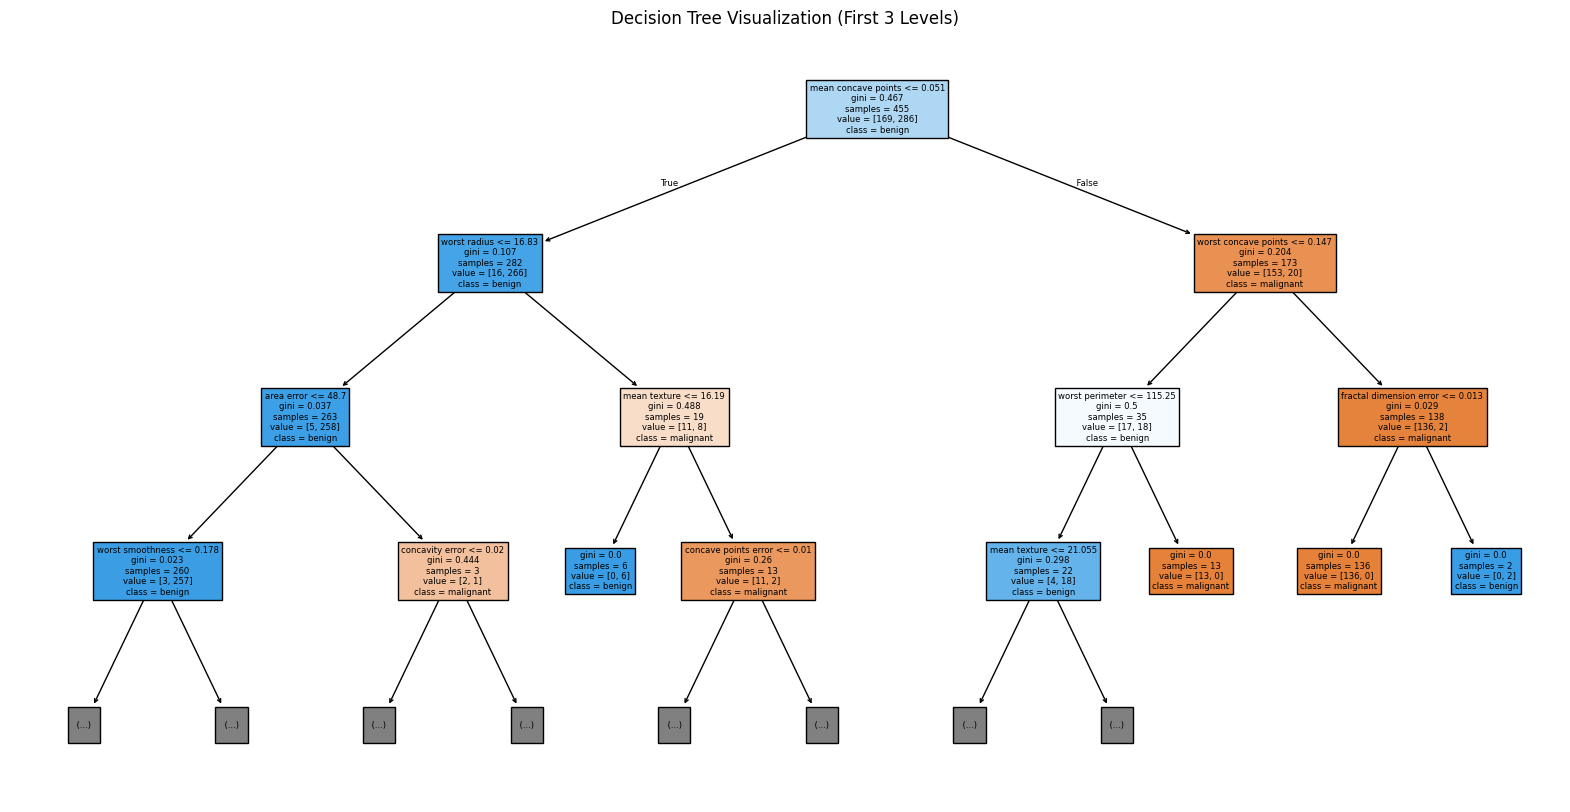

In [64]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=df.target_names, filled=True, max_depth=3)
plt.title("Decision Tree Visualization (First 3 Levels)")
plt.show()

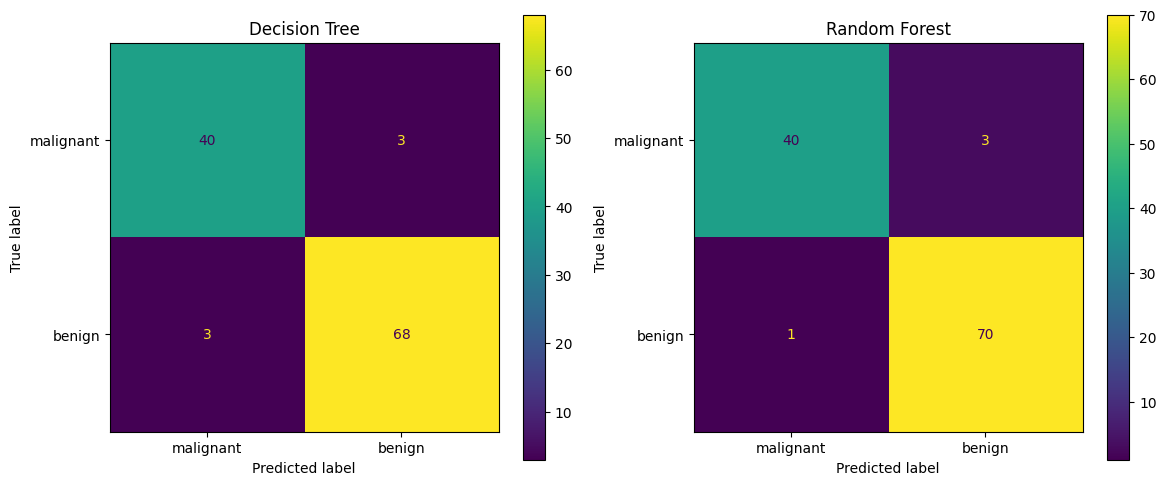

In [65]:
# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=df.target_names)
disp_dt.plot(ax=axes[0], values_format='d')
axes[0].set_title("Decision Tree")

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=df.target_names)
disp_rf.plot(ax=axes[1], values_format='d')
axes[1].set_title("Random Forest")

plt.tight_layout()
plt.show()

In [66]:
# --- Hyperparameter tuning for Decision Tree ---
dt_params = {
    'max_depth': [2, 4, 6, 8, 10, None]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

# Best DT model
best_dt_model = dt_grid.best_estimator_
best_dt_test_accuracy = accuracy_score(y_test, best_dt_model.predict(X_test))
best_dt_model,best_dt_test_accuracy

(DecisionTreeClassifier(max_depth=4, random_state=42), 0.9473684210526315)

In [67]:
# --- Hyperparameter tuning for Random Forest ---
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6, 8, None]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Best RF model
best_rf_model = rf_grid.best_estimator_
best_rf_test_accuracy = accuracy_score(y_test, best_rf_model.predict(X_test))
best_rf_model,best_rf_test_accuracy

(RandomForestClassifier(max_depth=8, n_estimators=150, random_state=42),
 0.9649122807017544)